#Regression analysis

In this project I have conducted regression analysis for one of the most popular regression projects available, California Housing. Analysis will compare few different regression techniques, such as Partial Least Squares (PLS), Ridge and Lasso regression and ElasticNet regression.

##**PROJECT**

Importing all needed packages

In [ ]:
from sklearn.datasets import fetch_california_housing

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV)
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer, Normalizer, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###Initialize California Housing Data

In [ ]:
california_housing = fetch_california_housing()

Scaning dataset

In [ ]:
print('Description:')
print(california_housing.DESCR)
print('-'*10)

Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This datase

In [ ]:
print('Data:')
print(california_housing.data)
print(california_housing.data.shape)
print('-'*10)

Data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
(20640, 8)
----------


In [ ]:
print('Feature names:')
print(california_housing.feature_names)
print('-'*10)
print('Target:')
print(california_housing.target)
print('-'*10)

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
----------
Target:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
----------


In [ ]:
# Create dataframe
df_california_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_california_housing['MedHouseVal'] = california_housing.target
# Casting MedHouseVal dtype cat as float64
df_california_housing['MedHouseVal'] = df_california_housing['MedHouseVal'].astype(float)

### Data Preprocessing


In [ ]:
# Check newly created dataframe
df_california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


> We have 20640 records with no NA values, therefore we do not have to impute any values.

In [ ]:
# Display data snapshot
df_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Plot checking for distribution

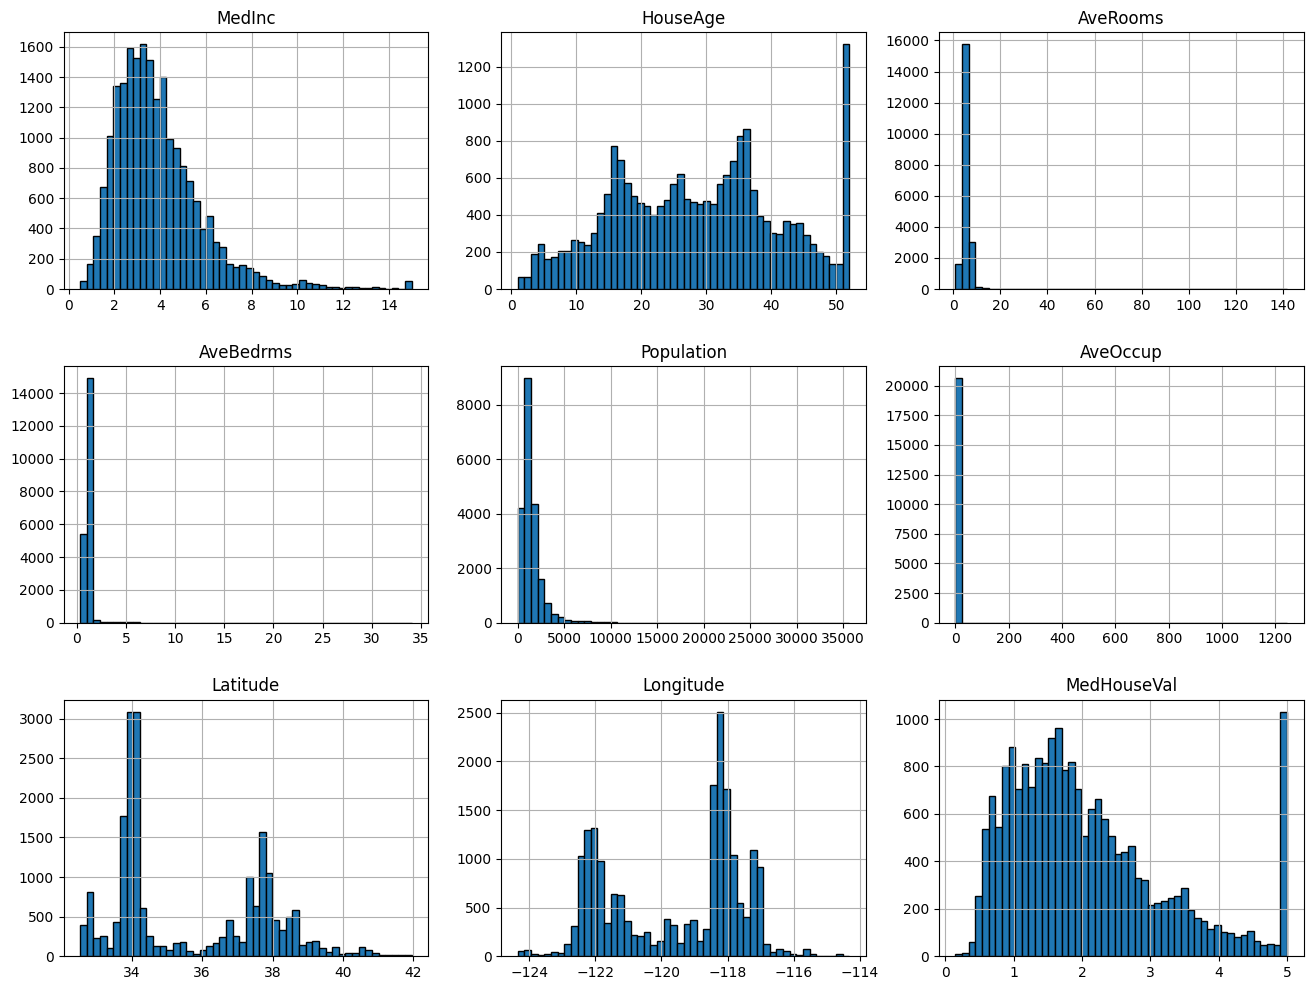

In [ ]:
df_california_housing.hist(figsize=(16, 12), bins=50, edgecolor='black')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

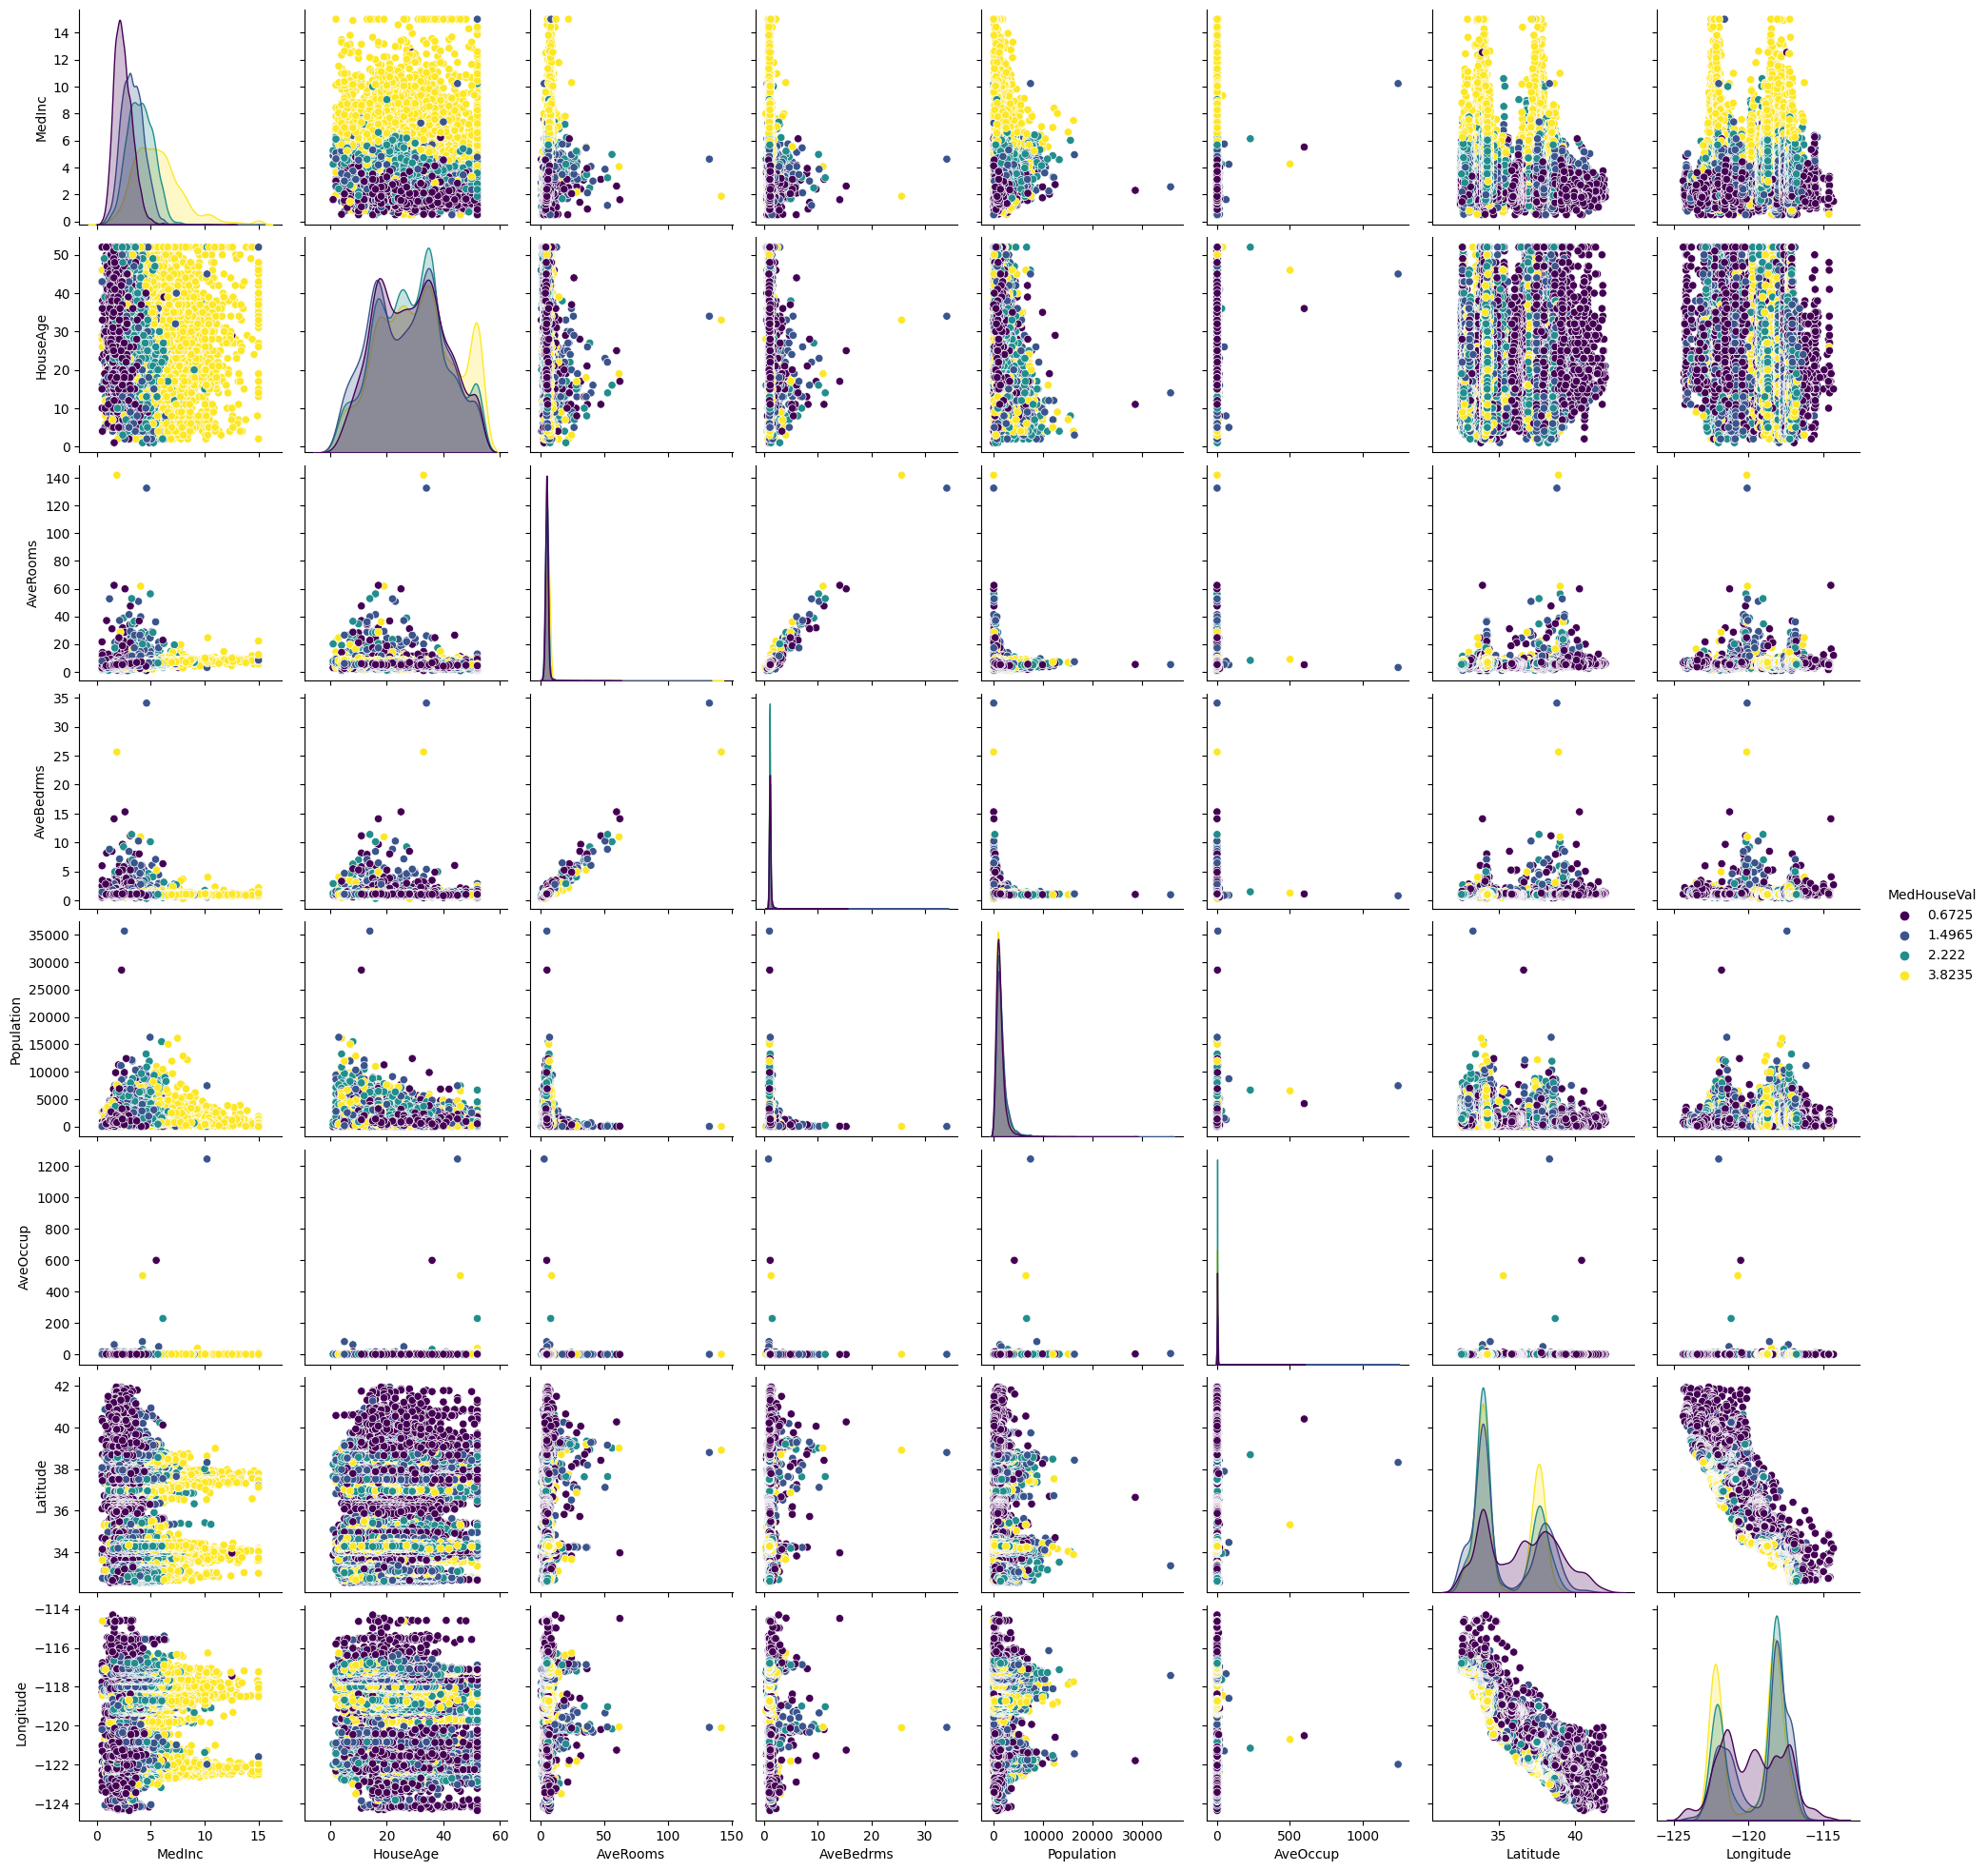

In [ ]:
# Create pairwise plots
df_california_housing['MedHouseVal'] = pd.qcut(df_california_housing['MedHouseVal'], 4, retbins=False)
df_california_housing['MedHouseVal'] = df_california_housing['MedHouseVal'].apply(lambda x: x.mid).astype(float)
sns.pairplot(data=df_california_housing, hue='MedHouseVal', palette='viridis')
plt.show()

> On first glance, we can see that the data is requires further processing. We can see that about half of the plots are negatively distributed. We also speculate that there will be extreme outliers present within the data due to sudden extreme preak present in some plots.

####Check for outliers

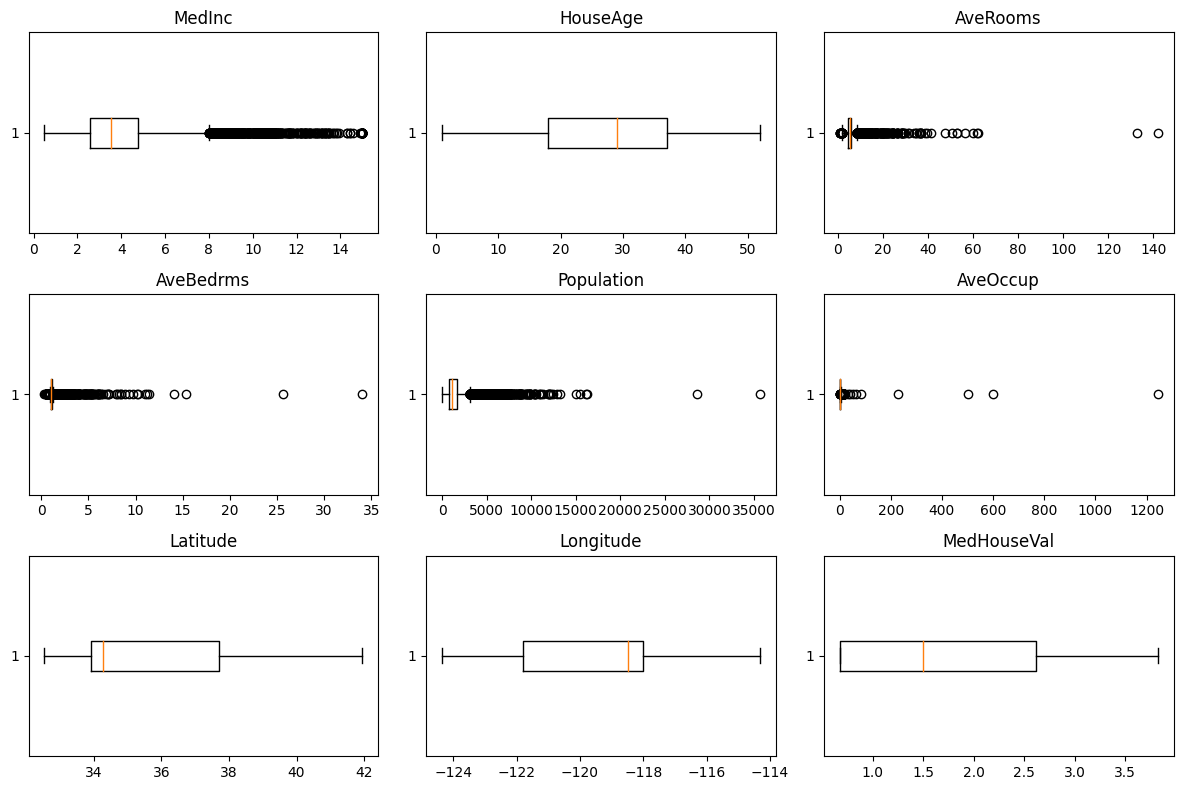

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

axes = axes.flatten()

for i, column in enumerate(df_california_housing.columns):
    ax = axes[i]
    ax.boxplot(df_california_housing[column], vert=False)
    ax.set_title(column)

for i in range(len(df_california_housing.columns), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()

plt.grid(color='white', linestyle='-.', linewidth=0.5)
plt.show()

> From BoxPlot's and max values for each column, we can observe that we have outliers in the upper and lower range of observation values. Columns that have outliers are: MedInc, AveRooms, AveBedrms, Population and AveOccup.

**> We proceed to clip outliers from the dataset**

In [ ]:
# Step 1: Copy the Original DataFrame
df_california_housing_final = df_california_housing.copy()

# Step 2: Calculate Percentiles
lower_percentiles = df_california_housing.quantile(0.02)
upper_percentiles = df_california_housing.quantile(0.98)

# Step 3: Clip Values
clip_returns = df_california_housing_final.clip(lower=lower_percentiles, upper=upper_percentiles, axis=1)

# Step 4: Update the DataFrame
df_california_housing_final.iloc[:] = clip_returns

# Step 5: Display the Updated DataFrame
print(df_california_housing_final)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

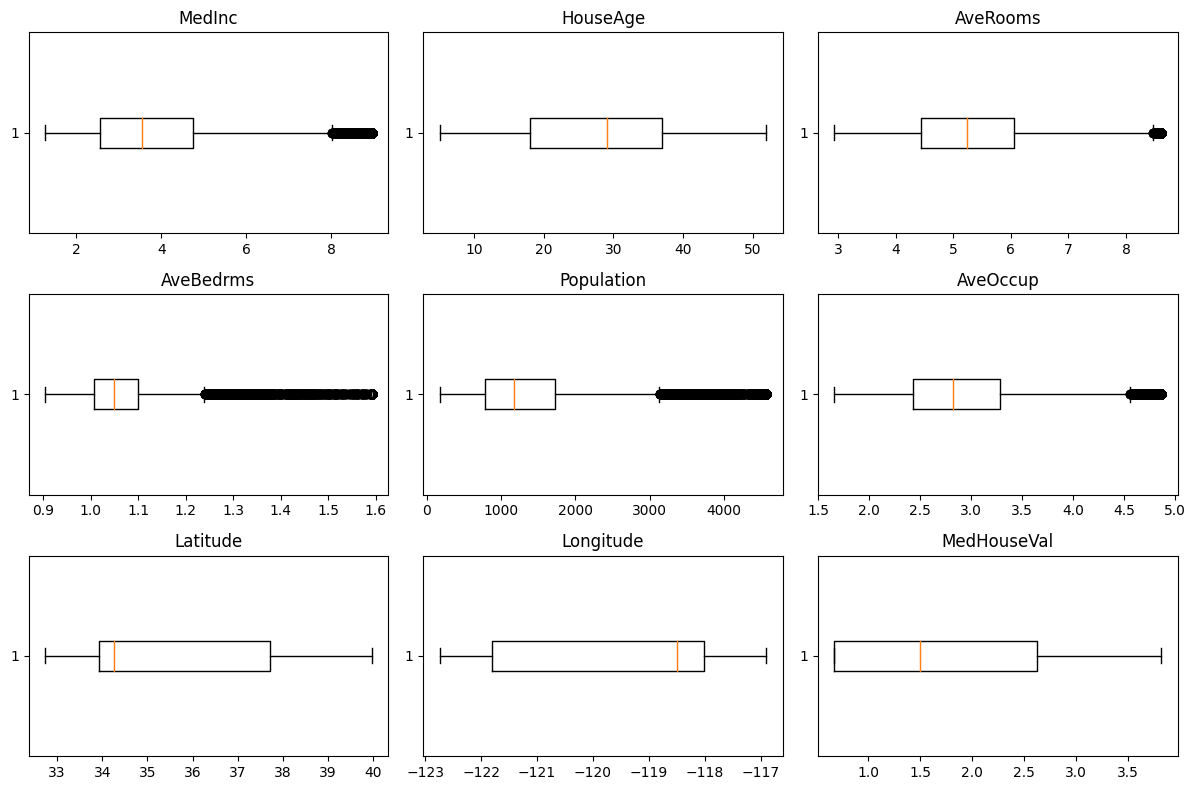

In [ ]:
# Check for outliers
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

axes = axes.flatten()

for i, column in enumerate(df_california_housing_final.columns):
    ax = axes[i]
    ax.boxplot(df_california_housing_final[column], vert=False)
    ax.set_title(column)

for i in range(len(df_california_housing_final.columns), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()

plt.grid(color='white', linestyle='-.', linewidth=0.5)
plt.show()

> After modulating our clipping values we see that at 2%, we have removed a majority of outliers. Some outliers remain 5 of 8 features.

####Scaler selection

In [ ]:
feature_names = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

In [ ]:
def do_cross_validation(df, x, y):
    # Evaluate the models using cross-validation
    model_california_housing_pt1 = make_pipeline(x,
                                            y
                                            )

    cv_california_housing_pt1    = cross_validate(model_california_housing_pt1,
                                            df.values,
                                            df['MedHouseVal'],
                                            return_estimator=True,
                                            n_jobs=1,
                                            cv=10
                                            )
    cv_california_housing_pt1['estimator']


    coef_california_housing_pt1 = pd.DataFrame([iEstimator[-1].coef_ for iEstimator in cv_california_housing_pt1['estimator']],
                                            columns=df.columns
                                        )
    coef_california_housing_pt1.drop('MedHouseVal',axis=1,inplace=True)
    print(coef_california_housing_pt1.head(20))

    # Get R-squared
    score_california_housing = cv_california_housing_pt1['test_score']
    print(f'R2 score: {score_california_housing.mean():.3f} +/- {score_california_housing.std():.3f}')

    # Create a box plot for the estimated coefficients
    color_boxplot = {'boxes': 'tab:blue',
                    'whiskers': 'black',
                    'medians': 'black',
                    'caps': 'black'
                    }

    coef_california_housing_pt1.plot.box(vert=False,
                                    color=color_boxplot,
                                    patch_artist=True,
                                    notch=False,
                                    figsize=(12, 8)
                                    )

    plt.axvline(x=0, ymin=-1, ymax=1, color='tab:red', linestyle='--')
    plt.title(f'Coefficients of OLS regression models via cross-validation {x} & {y}')
    plt.show()

         MedInc      HouseAge      AveRooms     AveBedrms    Population  \
0 -1.218855e-14  4.440892e-16  9.992007e-15 -7.716050e-15 -6.106227e-16   
1 -2.845103e-15  0.000000e+00 -2.220446e-16 -4.163336e-16  2.628106e-15   
2 -1.977799e-15  0.000000e+00  1.110223e-15 -2.775558e-16  9.159340e-16   
3  2.663994e-15  8.881784e-16  1.776357e-15  5.551115e-16 -3.989864e-16   
4  2.747273e-15  2.220446e-15 -4.440892e-15  7.771561e-16  2.133710e-16   
5  1.294947e-15  8.881784e-16  1.776357e-15  7.771561e-16  8.899131e-16   
6 -2.910859e-15 -8.881784e-16  6.661338e-16 -5.551115e-17 -1.020234e-15   
7 -1.561044e-15  4.440892e-16 -8.881784e-16  2.220446e-16  1.786765e-16   
8  3.565473e-15  3.108624e-15 -1.998401e-15  7.216450e-16  1.630640e-16   
9 -1.434368e-15  0.000000e+00  2.220446e-16 -5.551115e-16  3.400058e-16   

       AveOccup      Latitude     Longitude  
0  3.330669e-16  7.965850e-15  8.083811e-15  
1  1.026956e-15  9.992007e-16  7.216450e-16  
2 -3.538836e-16 -3.330669e-16 -7.598

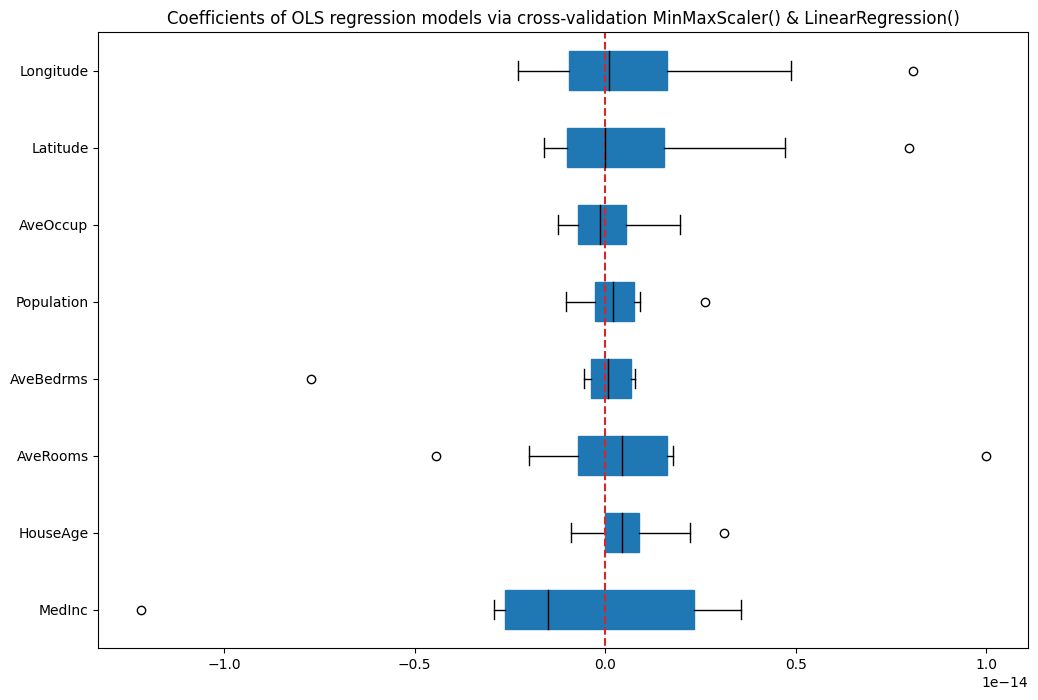

In [ ]:
do_cross_validation(df_california_housing_final, MinMaxScaler(), LinearRegression())

         MedInc      HouseAge      AveRooms     AveBedrms    Population  \
0  2.036657e-16  4.440892e-16 -1.110223e-16  1.665335e-16 -2.706169e-16   
1  2.070672e-16 -6.661338e-16 -1.332268e-15 -2.775558e-16 -1.724315e-15   
2  1.331727e-15  0.000000e+00 -1.665335e-15  4.440892e-16  6.938894e-18   
3 -1.169795e-15  2.220446e-16  5.551115e-16 -1.054712e-15  2.567391e-16   
4 -4.928187e-16 -7.771561e-16  1.110223e-16 -1.665335e-16  1.483189e-15   
5 -1.061728e-15 -4.440892e-16  4.440892e-16 -5.551115e-16  5.169476e-16   
6 -1.604514e-15  0.000000e+00  1.443290e-15 -1.665335e-16 -2.584738e-16   
7  5.004204e-16  6.661338e-16 -1.110223e-15  6.661338e-16  4.562323e-16   
8  3.898088e-16 -2.220446e-16  5.551115e-16  3.330669e-16 -1.387779e-16   
9  4.080176e-16  0.000000e+00 -3.330669e-16  1.665335e-16  4.093947e-16   

       AveOccup      Latitude     Longitude  
0  1.942890e-16  1.193490e-15  3.191891e-16  
1 -7.216450e-16 -2.442491e-15 -2.258610e-15  
2 -4.857226e-17  5.689893e-16  8.708

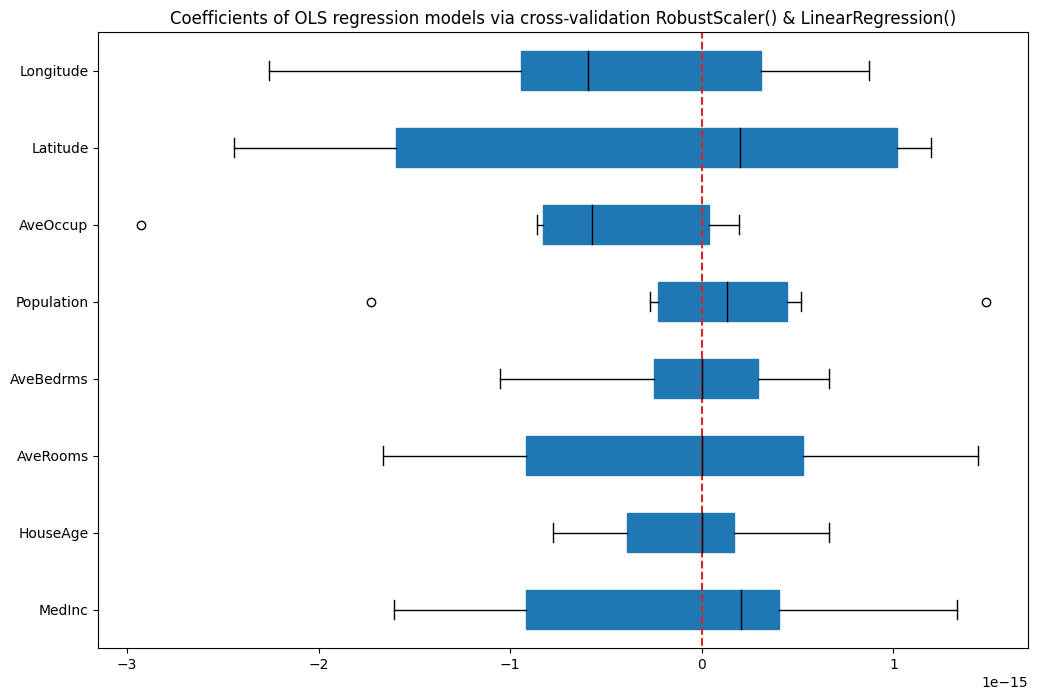

In [ ]:
do_cross_validation(df_california_housing_final, RobustScaler(), LinearRegression())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0 -0.026935  0.019269  0.039782  -0.001451   -0.005661 -0.023469   
1 -0.023885  0.016936  0.030636   0.000195   -0.005910 -0.013904   
2 -0.023448  0.018246  0.038879  -0.002083   -0.005666 -0.018432   
3 -0.024366  0.024621  0.034764  -0.000402   -0.005746 -0.015919   
4 -0.031222  0.017256  0.045366  -0.001952   -0.008214 -0.020036   
5 -0.029140  0.020008  0.042865  -0.000426   -0.006160 -0.020365   
6 -0.030812  0.013416  0.037472  -0.003355   -0.005701 -0.016733   
7 -0.034216  0.012666  0.052220  -0.007845   -0.007227 -0.021397   
8 -0.025770  0.021365  0.049800  -0.000049   -0.006499 -0.029599   
9 -0.032784  0.012330  0.041069  -0.003811   -0.006549 -0.019050   

       Latitude     Longitude  
0  1.154671e+13  3.175239e+13  
1  6.947063e-02  8.542316e+12  
2  7.154947e-02  2.621363e+12  
3  6.889907e-02  1.189447e+13  
4  7.100818e-02  1.686632e+13  
5  7.174570e-02  4.152299e+13  
6  8.624341e-02  1.665921e+

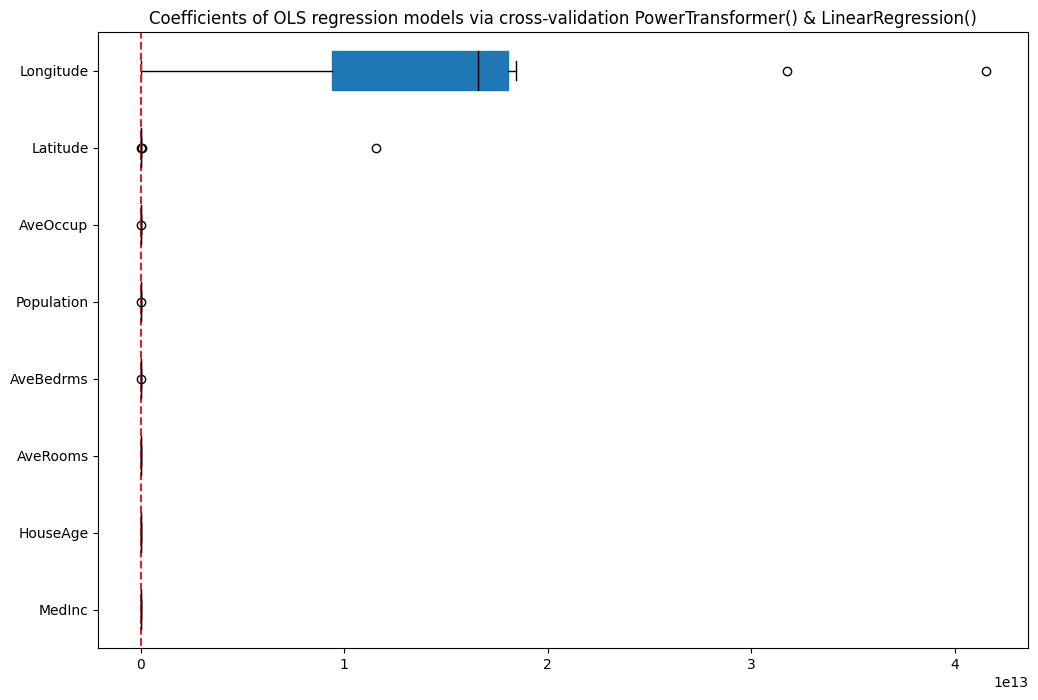

In [ ]:
do_cross_validation(df_california_housing_final, PowerTransformer(method='yeo-johnson'), LinearRegression())

      MedInc  HouseAge   AveRooms   AveBedrms  Population   AveOccup  \
0   3.298969  2.193598  17.365538  123.791681   -1.225920 -70.187118   
1   8.472598  2.559120  11.248096   83.875916   -0.535501 -62.777342   
2   6.955977  2.431916  15.026169  121.038403   -1.772234 -61.671527   
3   6.139459  2.230010  11.361122  154.313366   -1.789608 -56.680919   
4  14.953032  2.299411   5.960918  139.310939   -2.193199 -68.814025   
5   5.281867  2.108133  10.922104  140.970606   -1.803025 -62.631395   
6   7.209033  2.007223  17.736226  127.033876   -2.641789 -72.943508   
7   9.169521  1.792686  15.656881  121.920038   -1.731122 -60.792908   
8  15.024407  2.493496   6.244636  137.989475   -2.170848 -68.357306   
9  -0.520244  1.990008  17.436917   68.351340   -1.474689 -63.659752   

    Latitude  Longitude  
0   9.115259  13.464869  
1  14.168670  14.690730  
2   4.722228  12.207726  
3   9.054179  13.937910  
4   8.621631  13.199550  
5  10.980522  14.141342  
6   6.916977  13.408707  

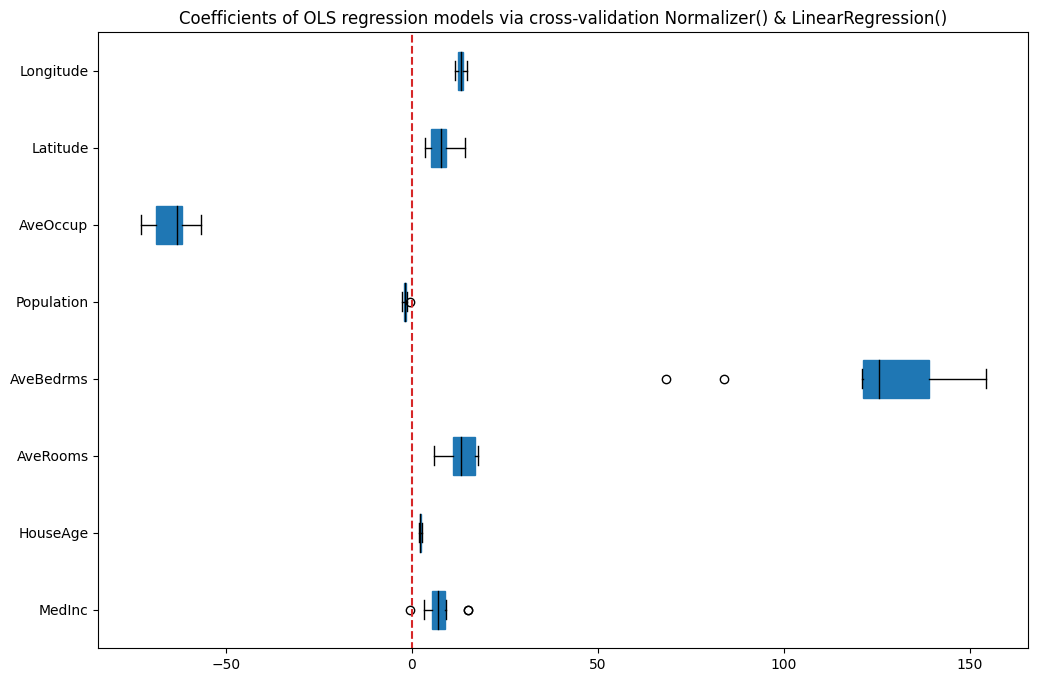

In [ ]:
do_cross_validation(df_california_housing_final, Normalizer(), LinearRegression())

> We can we utilizing the Normalizer produces the most impactful relationship between features, with 5 features having a clear positive or negative relationship (deviating away from the center) while producing the lowest R2 score.

####Correlation matrix

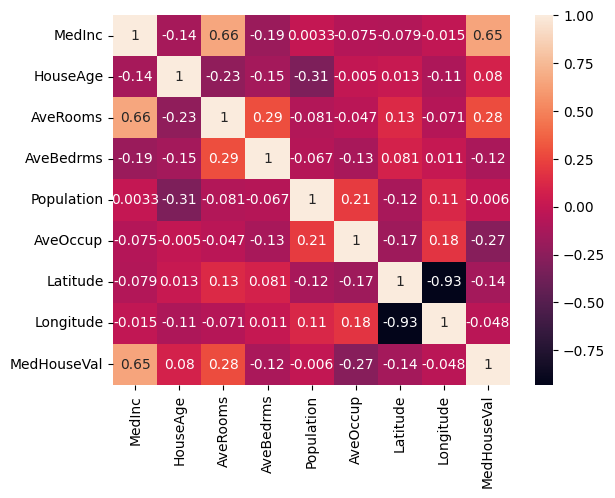

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt


corr_matrix = df_california_housing_final.corr()
sn.heatmap(corr_matrix,annot=True)
plt.show()

> We have observed the correlation matrix, and have concluded that there are no significant correlation that will produce impact on feature remove.

###Implementation of regression analysis


In [ ]:
ss = StandardScaler()
st_data = ss.fit_transform(df_california_housing_final)

trained_data = df_california_housing_final[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
ss_trained_data = ss.fit_transform(trained_data)

ss_df = pd.DataFrame(st_data, columns=df_california_housing_final.columns)

df_X_scaled = pd.DataFrame(ss_trained_data, columns=trained_data.columns)
df_y_scaled = pd.DataFrame(ss_df['MedHouseVal'], columns=['MedHouseVal'])

Regular OLS model

In [ ]:
sm_ols_california_housing = sm.OLS(df_y_scaled,
                                   df_X_scaled
                                  ).fit()

sm_ols_california_housing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              4276.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:08:55   Log-Likelihood:                         -19198.
No. Observations:               20640   AIC:                                  3.841e+04
Df Residuals:                   20632   BIC:                                  3.848e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.6594      0.008     85.326      0.000       0.644       0.675
HouseAge       0.0976      0.005     20.042      0.000       0.088       0.107
AveRooms      -0.1154      0.008    -14.908      0.000      -0.131      -0.100
AveBedrms      0.1080      0.005     19.983      0.000       0.097       0.119
Population     0.0527      0.005     11.176      0.000       0.043       0.062
AveOccup      -0.2295      0.005    -50.556      0.000      -0.238      -0.221
Latitude      -0.8999      0.014    -63.956      0.000      -0.928      -0.872
Longitude     -0.8390      0.014    -61.262      0.000      -0.866      -0.812
==============================================================================
Omnibus:                     1063.977   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.267
Skew:                           0.533   Prob(JB):                    6.72e-286
Kurtosis:                       3.626   Cond. No.                         6.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eliminate variable 'Population'

In [ ]:
sm_ols_california_housing = sm.OLS(df_y_scaled,
                                   df_X_scaled.drop(columns=['Population'])
                                  ).fit()

sm_ols_california_housing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                              4840.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:08:55   Log-Likelihood:                         -19260.
No. Observations:               20640   AIC:                                  3.853e+04
Df Residuals:                   20633   BIC:                                  3.859e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.6626      0.008     85.548      0.000       0.647       0.678
HouseAge       0.0784      0.005     17.157      0.000       0.069       0.087
AveRooms      -0.1247      0.008    -16.154      0.000      -0.140      -0.110
AveBedrms      0.1073      0.005     19.809      0.000       0.097       0.118
AveOccup      -0.2191      0.004    -49.165      0.000      -0.228      -0.210
Latitude      -0.9120      0.014    -64.812      0.000      -0.940      -0.884
Longitude     -0.8487      0.014    -61.912      0.000      -0.876      -0.822
==============================================================================
Omnibus:                      973.090   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1190.797
Skew:                           0.504   Prob(JB):                    2.64e-259
Kurtosis:                       3.607   Cond. No.                         6.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eliminate variables 'Population' and 'AveRooms'


In [ ]:
sm_ols_california_housing = sm.OLS(df_y_scaled,
                                   df_X_scaled.drop(columns=['Population', 'AveRooms'])
                                  ).fit()

sm_ols_california_housing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              5534.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:08:55   Log-Likelihood:                         -19390.
No. Observations:               20640   AIC:                                  3.879e+04
Df Residuals:                   20634   BIC:                                  3.884e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5621      0.005    121.065      0.000       0.553       0.571
HouseAge       0.0793      0.005     17.238      0.000       0.070       0.088
AveBedrms      0.0598      0.005     13.056      0.000       0.051       0.069
AveOccup      -0.2289      0.004    -51.522      0.000      -0.238      -0.220
Latitude      -1.0068      0.013    -78.236      0.000      -1.032      -0.982
Longitude     -0.9273      0.013    -71.901      0.000      -0.953      -0.902
==============================================================================
Omnibus:                      931.630   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1107.854
Skew:                           0.504   Prob(JB):                    2.71e-241
Kurtosis:                       3.523   Cond. No.                         5.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eliminate variables 'Population', 'AveRooms' and 'AveBedrms'

In [ ]:
sm_ols_california_housing = sm.OLS(df_y_scaled,
                                   df_X_scaled.drop(columns=['Population', 'AveRooms', 'AveBedrms'])
                                  ).fit()

sm_ols_california_housing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.614
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                              6553.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:08:55   Log-Likelihood:                         -19475.
No. Observations:               20640   AIC:                                  3.896e+04
Df Residuals:                   20635   BIC:                                  3.900e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5518      0.005    120.112      0.000       0.543       0.561
HouseAge       0.0717      0.005     15.647      0.000       0.063       0.081
AveOccup      -0.2374      0.004    -53.792      0.000      -0.246      -0.229
Latitude      -0.9783      0.013    -76.824      0.000      -1.003      -0.953
Longitude     -0.8995      0.013    -70.427      0.000      -0.925      -0.874
==============================================================================
Omnibus:                      985.277   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.999
Skew:                           0.523   Prob(JB):                    1.17e-255
Kurtosis:                       3.520   Cond. No.                         5.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since R-sqaured value has not changed much, we can conclude removing feature does not improve the R2 within our desired model.

In [ ]:
# Backward stepwise selection using scikit-learn RFE
from sklearn.feature_selection import RFE
import numpy as np

n_select = 5

ols_estimator   = LinearRegression()
rfe_estimator = RFE(estimator=ols_estimator,
                    n_features_to_select=n_select,
                    step=1
                   )


rfe_california_housing = rfe_estimator.fit_transform(df_X_scaled,
                                                     np.ravel(df_y_scaled)
                                                    )

mask_rfe_california_housing          = rfe_estimator.get_support()
feature_names_rfe_california_housing = df_X_scaled.columns[mask_rfe_california_housing]

print(f'The selected {n_select} features using RFE: {feature_names_rfe_california_housing}.')

The selected 5 features using RFE: Index(['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'], dtype='object').


RFE ranking output: [1 3 1 2 4 1 1 1].
RFE support output: [ True False  True False False  True  True  True].


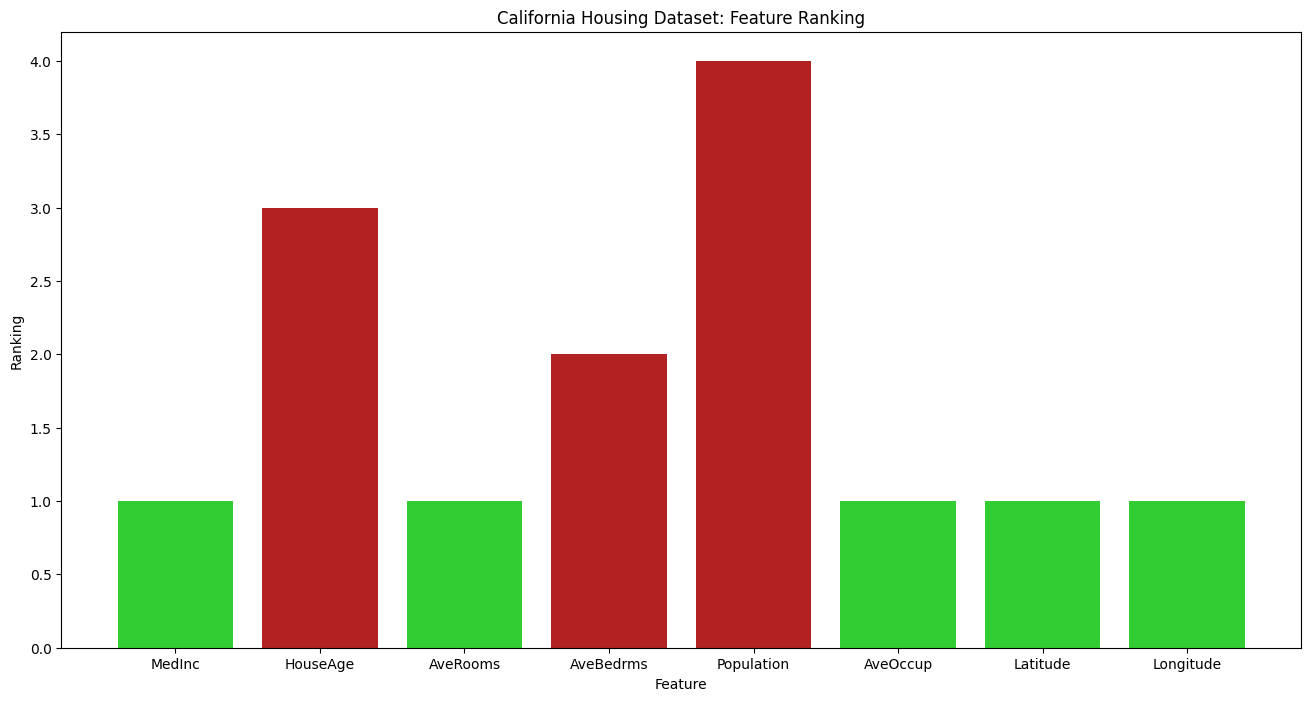

In [ ]:
# Plotting the results
ranking_rfe_california_housing = rfe_estimator.ranking_
print(f'RFE ranking output: {ranking_rfe_california_housing}.')
support_rfe_california_housing = rfe_estimator.support_
print(f'RFE support output: {support_rfe_california_housing}.')

color_map = ['limegreen' if iRank == 1 else 'firebrick' for iRank in ranking_rfe_california_housing]

plt.figure(figsize=(16, 8))
plt.bar(feature_names,
        ranking_rfe_california_housing,
        color=color_map
       )
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('California Housing Dataset: Feature Ranking')
plt.show()

In [ ]:
# Backward stepwise selection using scikit-learn RFECV
from sklearn.feature_selection import RFECV

n_min_select = 5
n_cv_rfe     = 5

ols_estimator   = LinearRegression()
rfecv_estimator = RFECV(estimator=ols_estimator,
                        min_features_to_select=n_min_select,
                        step=1,
                        cv=n_cv_rfe
                       )

rfecv_california_housing = rfecv_estimator.fit_transform(df_X_scaled,
                                                         np.ravel(df_y_scaled)
                                                        )

mask_rfecv_california_housing          = rfecv_estimator.get_support()
feature_names_rfecv_california_housing = df_X_scaled.columns[mask_rfecv_california_housing]

print(f'The optimal number of features using RFECV: {rfecv_estimator.n_features_}.')
print(f'The selected features using RFECV: {feature_names_rfecv_california_housing}.')

The optimal number of features using RFECV: 8.
The selected features using RFECV: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object').


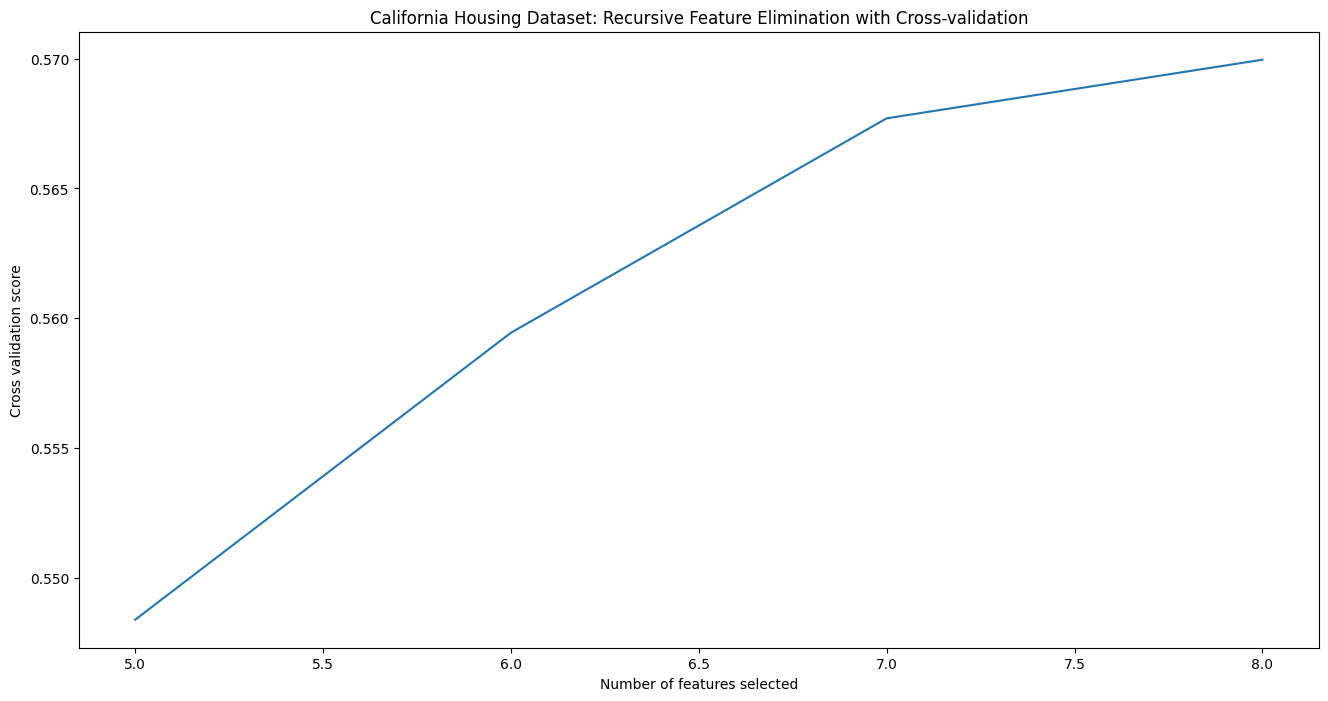

In [ ]:
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(16, 8))
plt.plot(range(n_min_select, len(rfecv_estimator.cv_results_['mean_test_score']) + n_min_select),
         rfecv_estimator.cv_results_['mean_test_score']
        )
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.title('California Housing Dataset: Recursive Feature Elimination with Cross-validation')
plt.show()

> Using RFE and RFECV, conclusion is that with the 'StandardScaled' scaler, dataset is most effective when all 8 features are used.

### Model Evaluation and comparison between In and Out of sample performance

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, df_y_scaled, test_size=0.2, random_state=42)

# Initialize models

def _call_gsearch_cv(name, X, Y):
    lasso_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1]}

    _max_iter = 400000

    if name == 'Lasso':
        lasso_regressor_grid_search = GridSearchCV(Lasso(max_iter = _max_iter), lasso_regressor_parameter, cv = 2)
        lasso_regressor_grid_search.fit(X, Y)
        # print(lasso_regressor_grid_search.best_params_['alpha'])
        return Lasso(alpha=lasso_regressor_grid_search.best_params_['alpha'], max_iter=_max_iter)


    else:
        ridge_regressor_grid_search = GridSearchCV(Ridge(max_iter = _max_iter), lasso_regressor_parameter, cv = 2)
        ridge_regressor_grid_search.fit(X, Y)
        # print(ridge_regressor_grid_search.best_params_['alpha'])
        return Ridge(alpha=ridge_regressor_grid_search.best_params_['alpha'], max_iter=_max_iter)

_cv = 10

models = {
    "OLS": LinearRegression(),
    "PLS6": PLSRegression(n_components=6),
    "PLS7": PLSRegression(n_components=7),
    "PLS": PLSRegression(n_components=8),
    "Ridge": _call_gsearch_cv('Ridge', X_train, y_train),
    "RidgeCV": RidgeCV(cv=_cv),
    "Lasso": _call_gsearch_cv('Lasso', X_train, y_train),
    "LassoCV": LassoCV(cv=_cv),
    "ElasticNet": ElasticNet(alpha=1, l1_ratio=0.2),
    "ElasticNetCV": ElasticNetCV(cv=_cv)
}
# Function to evaluate model performance


def evaluate_model(model, X_train, X_test, y_train, y_test):

    temp = model.fit(X_train, y_train)


    y_pred_train = temp.predict(X_train)
    y_pred_test = temp.predict(X_test)


    performance = {
        "Train R2": r2_score(y_train, y_pred_train),
        "Test R2": r2_score(y_test, y_pred_test),
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test)
    }

    return performance

> Using gridsearchCV we find the ideal alpha for LASSO and Ridge regression. We also use that value as hardcoded for elasticNet.

### Results Presentation

In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Display results
pd.DataFrame(results)

,OLS,PLS6,PLS7,PLS,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
Train R2,0.627655,0.613700,0.623862,0.627655,0.627655,0.627655,0.405098,0.627638,0.281270,0.627605
Test R2,0.608066,0.590902,0.603757,0.608066,0.608063,0.608063,0.388042,0.608066,0.270475,0.608008
Train MSE,0.372812,0.386784,0.376610,0.372812,0.372812,0.372812,0.595648,0.372829,0.719632,0.372862
Test MSE,0.389943,0.407019,0.394229,0.389943,0.389945,0.389945,0.608848,0.389943,0.725818,0.390000
Train MAE,0.479471,0.483717,0.481748,0.479471,0.479468,0.479468,0.625327,0.479480,0.703016,0.479464
Test MAE,0.489302,0.494770,0.492617,0.489302,0.489299,0.489299,0.629463,0.489300,0.703858,0.489274


In [ ]:
output = pd.DataFrame(results)
output.to_csv('out.csv')

In [ ]:
output

,OLS,PLS6,PLS7,PLS,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
Train R2,0.627655,0.613700,0.623862,0.627655,0.627655,0.627655,0.405098,0.627638,0.281270,0.627605
Test R2,0.608066,0.590902,0.603757,0.608066,0.608063,0.608063,0.388042,0.608066,0.270475,0.608008
Train MSE,0.372812,0.386784,0.376610,0.372812,0.372812,0.372812,0.595648,0.372829,0.719632,0.372862
Test MSE,0.389943,0.407019,0.394229,0.389943,0.389945,0.389945,0.608848,0.389943,0.725818,0.390000
Train MAE,0.479471,0.483717,0.481748,0.479471,0.479468,0.479468,0.625327,0.479480,0.703016,0.479464
Test MAE,0.489302,0.494770,0.492617,0.489302,0.489299,0.489299,0.629463,0.489300,0.703858,0.489274


####Plotting the results

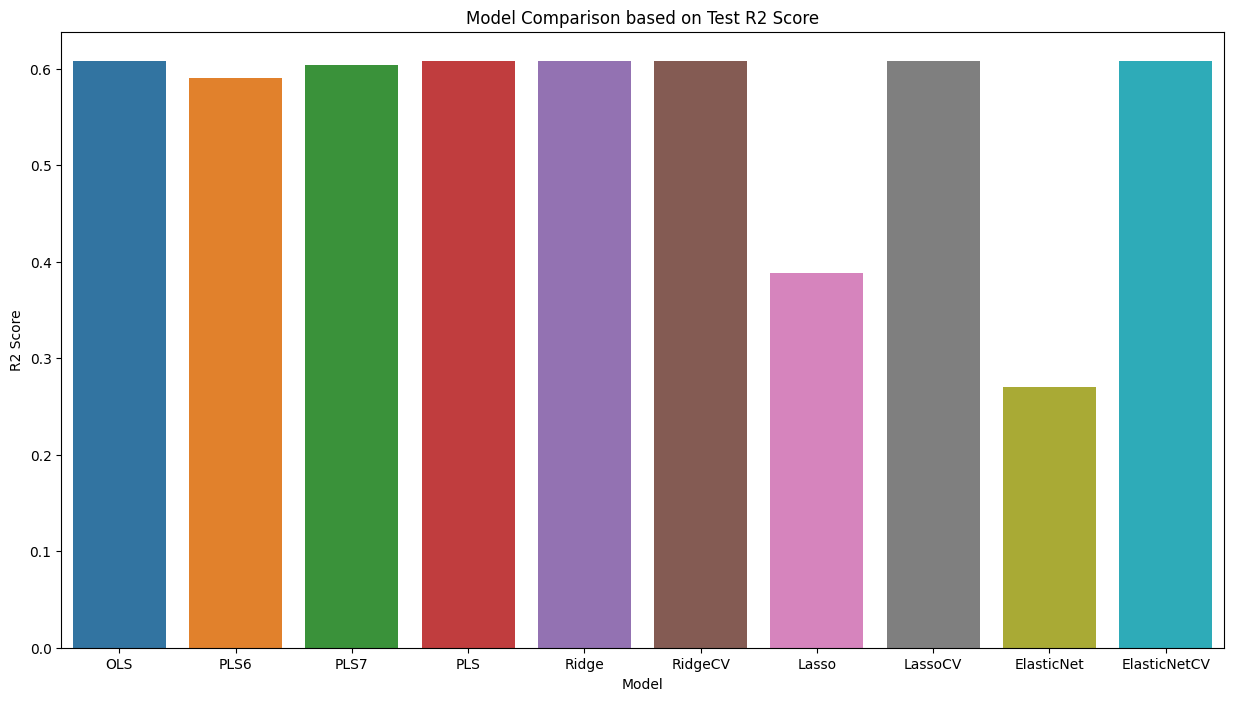

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=results_df, x=results_df.index, y="Test R2")
plt.title("Model Comparison based on Test R2 Score")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.show()

> We can see from the results that **OLS** and **LassoCV** have the highest R2 value. We have investigated the PLS with a varied number of coeffiecients, which show that PLS with 8 is most effective. Based on the **initial t statistics** we decided to include all 8 features within the model.